# 1. Points generator

In [1]:
from components.points_generator import PointsGenerator

# For testing you can limit the points to 50 :D
pg = PointsGenerator(n_points=100)
pg.generate_points()

In [2]:
# get each attribute:
pg.generated_points
# pg.demand_df
# pg.supply_df
# pg.magazines_points
# pg.distances

{0: {'coords': (130, 106), 'point_type': 'supply'},
 1: {'coords': (124, 159), 'point_type': 'demand'},
 2: {'coords': (160, 184), 'point_type': 'demand'},
 3: {'coords': (175, 157), 'point_type': 'supply'},
 4: {'coords': (162, 145), 'point_type': 'demand'},
 5: {'coords': (132, 109), 'point_type': 'supply'},
 6: {'coords': (137, 195), 'point_type': 'magazine'},
 7: {'coords': (195, 130), 'point_type': 'supply'},
 8: {'coords': (160, 164), 'point_type': 'supply'},
 9: {'coords': (114, 151), 'point_type': 'supply'},
 10: {'coords': (107, 144), 'point_type': 'demand'},
 11: {'coords': (113, 154), 'point_type': 'supply'},
 12: {'coords': (120, 156), 'point_type': 'demand'},
 13: {'coords': (167, 144), 'point_type': 'demand'},
 14: {'coords': (124, 130), 'point_type': 'demand'},
 15: {'coords': (186, 192), 'point_type': 'supply'},
 16: {'coords': (101, 108), 'point_type': 'demand'},
 17: {'coords': (140, 106), 'point_type': 'demand'},
 18: {'coords': (110, 147), 'point_type': 'demand'},
 

# 2. VRP Algorithm

In [3]:
from components.vrp_algorithm import VRPAlgorithm
from components.ga_components import *

# Instantiate the VRPAlgorithm object with some parameters...
# Here you can also limit the iterations for testing purposes
vrp = VRPAlgorithm(population_size=20, n_iterations=100,
selector=TournamentSelector(0.35), crossover=PMXCrossover(0.85), mutator=InverseMutator(0.025))

In [4]:
# learn...
vrp.learn(pg)

Cat in tuna demand car:             False
Cat in tuna supply car:             False
Starting algorithm...
Iteration: 0.                 Result: 12505.142300678543
Iteration: 5.                 Best result: 10638.654027570201
Iteration: 10.                 Best result: 10544.866383999975
Iteration: 15.                 Best result: 10544.866383999975
Iteration: 20.                 Best result: 10504.121549380128
Iteration: 25.                 Best result: 10491.53743318224
Iteration: 30.                 Best result: 10278.626970602756
Iteration: 35.                 Best result: 10224.54913311742
Iteration: 40.                 Best result: 10202.730456202782
Iteration: 45.                 Best result: 10202.730456202782
Iteration: 50.                 Best result: 10202.730456202782
Iteration: 55.                 Best result: 10202.730456202782
Iteration: 60.                 Best result: 10032.868812841758
Iteration: 65.                 Best result: 9804.18924265272
Iteration: 70.         

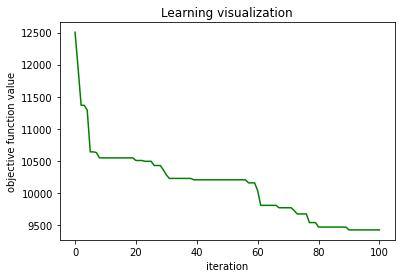

In [5]:
# Visualize the learning curves...
vrp.learning_visualization

In [6]:
# A one-row pandas df that contains dictionaries with the best routes for each product within each task
# demand_routes - we deliver there
# supply_routes - we pickup from there
# each product represent one car, so we have 6 cars in total
vrp.best_paths

,demand_routes,supply_routes
0,"{'Tuna': [3, 35, 76, 41, 46, 2, 84, 55, 36, 19...","{'Tuna': [3, 83, 30, 59, 53, 82, 37, 15, 21, 9..."


In [7]:
# EXAMPLE: how to get the route for Uran, from the supply_routes
# 0 because always only one row
vrp.best_paths['supply_routes'][0]['Uran']

[0,
 83,
 30,
 53,
 82,
 37,
 15,
 21,
 90,
 45,
 48,
 94,
 57,
 85,
 11,
 9,
 97,
 74,
 88,
 65,
 26,
 89,
 62,
 5,
 86,
 31,
 3,
 68,
 33,
 58,
 40,
 75,
 0,
 98,
 25,
 81,
 7]

In [8]:
# :)
vrp.ile_janusz_zaoszczedzil()

Gdyby Janusz na łoko (na łoko to jeden umar)
            wyznaczał trasy swoich ciężarówek, to by zrobiły
            one 12505.14 km. Czyli przy łobecnych cenach dizla,
            śr. 7.50 zł i średnim spalaniu dostawczaka 13l.,
            to by wydoł 81283.42 zł na paliwo. Kurła!
Gdyby Janusz się nos posłuchoł i kupił nosz pakiet
            maszin lerningowy, to by jego ciężarówki zrobiły
            9421.02 km, czyli o 3084.12 km
            mniej! Janusz by załoszczędził
            23130.92 zł! Kurła!
